# Network Metrics Computation and EDA

<b>Input Files: </b>
- Edgelist by Brand
- Nodelist by Brand

The above files can be generated using the notebook *3_Brand_Network_Extraction_From_Database.ipynb* located in folder *1_Database_and_Network_Setup*.

In [1]:
import pandas as pd
import numpy as np
import igraph
import glob
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import matplotlib.dates as mdates
import os

## 1. Generate Network Metrics by Brand

In [2]:
#list all filepaths
bad_edge = glob.glob('2015 to 2017 Ratings Network_v2\Bad Brands (2015 to 2017)\*')
good_edge = glob.glob('2015 to 2017 Ratings Network_v2\Good Brands (2015 to 2017)\*')
bad_node = glob.glob('2015 to 2017 Ratings Network_v2\Bad Brands Nodelist\*')
good_node = glob.glob('2015 to 2017 Ratings Network_v2\Good Brands Nodelist\*')

all_edge = bad_edge + good_edge
all_node = bad_node + good_node
year = [2015, 2016, 2017]

### 1.1 Compute Graph Metrics

In [3]:
# Helper function
def get_graph(brand, year):
    
    edge_path = all_edge[brand]
    node_path = all_node[brand]

    start = pd.to_datetime(str(year) + '-01' + '-01', infer_datetime_format=True)
    end = pd.to_datetime(str(year) + '-12' + '-31', infer_datetime_format=True)

    edge = pd.read_csv(edge_path, index_col=0)
    edge['user_i_ratingdate'] = pd.to_datetime(edge['user_i_ratingdate'], infer_datetime_format=True)
    edge['user_j_ratingdate'] = pd.to_datetime(edge['user_j_ratingdate'], infer_datetime_format=True)

    edge = edge[edge['user_i_ratingdate'] >= start]
    edge = edge[edge['user_i_ratingdate'] <= end]
    #edge = edge[edge['user_j_ratingdate'] >= start]
    edge = edge[edge['user_j_ratingdate'] <= end]
    edge = edge.drop_duplicates(subset=['user_i', 'user_j']) #
    edge['tuple'] = edge[['user_i', 'user_j']].apply(tuple, 1).apply(sorted).apply(tuple) #
    edge = edge.drop_duplicates('tuple') #
    
    n_edge = len(edge)

    node = pd.read_csv(node_path, index_col=0)
    node['date'] = pd.to_datetime(node['date'], infer_datetime_format=True)
        
    brand = node.brand.iloc[0]
    bad_brand = node.banned.iloc[0]

    node = node[node['date'] >= start]
    node = node[node['date'] <= end]
    node_l1 = list(node.user_id)
    node_l2 = list(edge.user_i)
    node_l3 = list(edge.user_j)
    node = node_l1 + node_l2 + node_l3
    node = list(set(node))
    
    n_node = len(node)

    if len(node) > 1:
        
        #edge_list = [tuple(x) for x in edge[['user_i', 'user_j']].values]
        edge_list = list(edge['tuple'])
        node_list = node

        g = igraph.Graph()
        g.add_vertices(node_list)
        g.add_edges(edge_list)

        density = g.density(loops=False)
        diameter = g.diameter()
        degree = np.mean(g.degree())
        clustering = g.transitivity_undirected()
        largest_component = g.clique_number()

        network_metrics = pd.DataFrame({'Brand':[brand], 
                                        'year':[year],
                                        'bad_brand':[bad_brand],
                                        'n_nodes':[n_node],
                                        'n_edges':[n_edge],
                                        'density':[density], 
                                        'degree':[degree], 
                                        'diameter':[diameter], 
                                        'clustering':[clustering],
                                        'largest_component':[largest_component]})

    else:
        network_metrics = pd.DataFrame({'Brand':[brand], 
                                        'year':[year],
                                        'bad_brand':[bad_brand],
                                        'n_nodes':[n_node],
                                        'n_edges':[n_edge],
                                        'density':[None], 
                                        'degree':[None], 
                                        'diameter':[None], 
                                        'clustering':[None],
                                        'largest_component':[None]})

    print(brand, year)

    return network_metrics
    

In [4]:
# Generate network metrics for all brands
# NOTE: TAKES > 1H

col = ['Brand', 'year', 'bad_brand', 'density', 'degree', 'diameter', 'clustering', 'largest_component', 'n_nodes', 'n_edges']
data = pd.DataFrame(columns=col)

for i in range(len(all_node)):
    for j in year:
        data = data.append(get_graph(i, j), ignore_index=False)

data.reset_index(drop=True, inplace=True)
data.to_csv('network_metrics.csv')

Amzdeal 2015
Amzdeal 2016
Amzdeal 2017
AUKEY 2015
AUKEY 2016
AUKEY 2017
CHOETECH 2015
CHOETECH 2016
CHOETECH 2017
HooToo 2015
HooToo 2016
HooToo 2017
LETSCOM 2015
LETSCOM 2016
LETSCOM 2017


C:\Users\jiang\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Mpow 2015
Mpow 2016
Mpow 2017
OMORC 2015
OMORC 2016
OMORC 2017
RAVPower 2015
RAVPower 2016
RAVPower 2017
TaoTronics 2015
TaoTronics 2016
TaoTronics 2017
TOMTOP 2015
TOMTOP 2016
TOMTOP 2017
VicTsing 2015
VicTsing 2016
VicTsing 2017
VOGEK 2015
VOGEK 2016
VOGEK 2017
Vtin 2015
Vtin 2016
Vtin 2017
YKS 2015
YKS 2016
YKS 2017
1MORE 2015
1MORE 2016
1MORE 2017
ABLEGRID 2015
ABLEGRID 2016
ABLEGRID 2017
ANCwear 2015
ANCwear 2016
ANCwear 2017
AudioQuest 2015
AudioQuest 2016
AudioQuest 2017
Avantree 2015
Avantree 2016
Avantree 2017
Belkin 2015
Belkin 2016
Belkin 2017
BENEWY 2015
BENEWY 2016
BENEWY 2017
Braven 2015
Braven 2016
Braven 2017
BUBM 2015
BUBM 2016
BUBM 2017
CableGeeker 2015
CableGeeker 2016
CableGeeker 2017
CableJive 2015
CableJive 2016
CableJive 2017
CalDigit 2015
CalDigit 2016
CalDigit 2017
Cerwin-Vega 2015
Cerwin-Vega 2016
Cerwin-Vega 2017
CHUWI 2015
CHUWI 2016
CHUWI 2017
Cisco 2015
Cisco 2016
Cisco 2017
Comsoon 2015
Comsoon 2016
Comsoon 2017
COOLEAD 2015
COOLEAD 2016
COOLEAD 2017
Cruc

In [4]:
df = pd.read_csv('network_metrics.csv', index_col=0)
df.head()

,Brand,year,bad_brand,density,degree,diameter,clustering,largest_component,n_nodes,n_edges
0,Amzdeal,2015,1,0.190616,18.489796,5.0,0.785898,22.0,98,906
1,Amzdeal,2016,1,0.117218,14.066116,6.0,0.869615,26.0,121,851
2,Amzdeal,2017,1,0.147147,5.297297,6.0,0.767442,10.0,37,98
3,AUKEY,2015,1,0.054116,105.471795,9.0,0.844649,175.0,1950,102835
4,AUKEY,2016,1,0.012854,52.868255,14.0,0.783418,140.0,4114,108750


### 1.2 Add on Normalized Graph Metrics

To control for different graph sizes.

In [5]:
df['diameter_normalised'] = df.diameter/df.n_nodes
df['largest_component_normalised'] = df.largest_component/df.n_nodes
df.head()

,Brand,year,bad_brand,density,degree,diameter,clustering,largest_component,n_nodes,n_edges,diameter_normalised,largest_component_normalised
0,Amzdeal,2015,1,0.190616,18.489796,5.0,0.785898,22.0,98,906,0.051020,0.224490
1,Amzdeal,2016,1,0.117218,14.066116,6.0,0.869615,26.0,121,851,0.049587,0.214876
2,Amzdeal,2017,1,0.147147,5.297297,6.0,0.767442,10.0,37,98,0.162162,0.270270
3,AUKEY,2015,1,0.054116,105.471795,9.0,0.844649,175.0,1950,102835,0.004615,0.089744
4,AUKEY,2016,1,0.012854,52.868255,14.0,0.783418,140.0,4114,108750,0.003403,0.034030


## 2. Exploratory Data Analysis

Inspect differences between good brands (label = 0) and bad brands (label = 1).

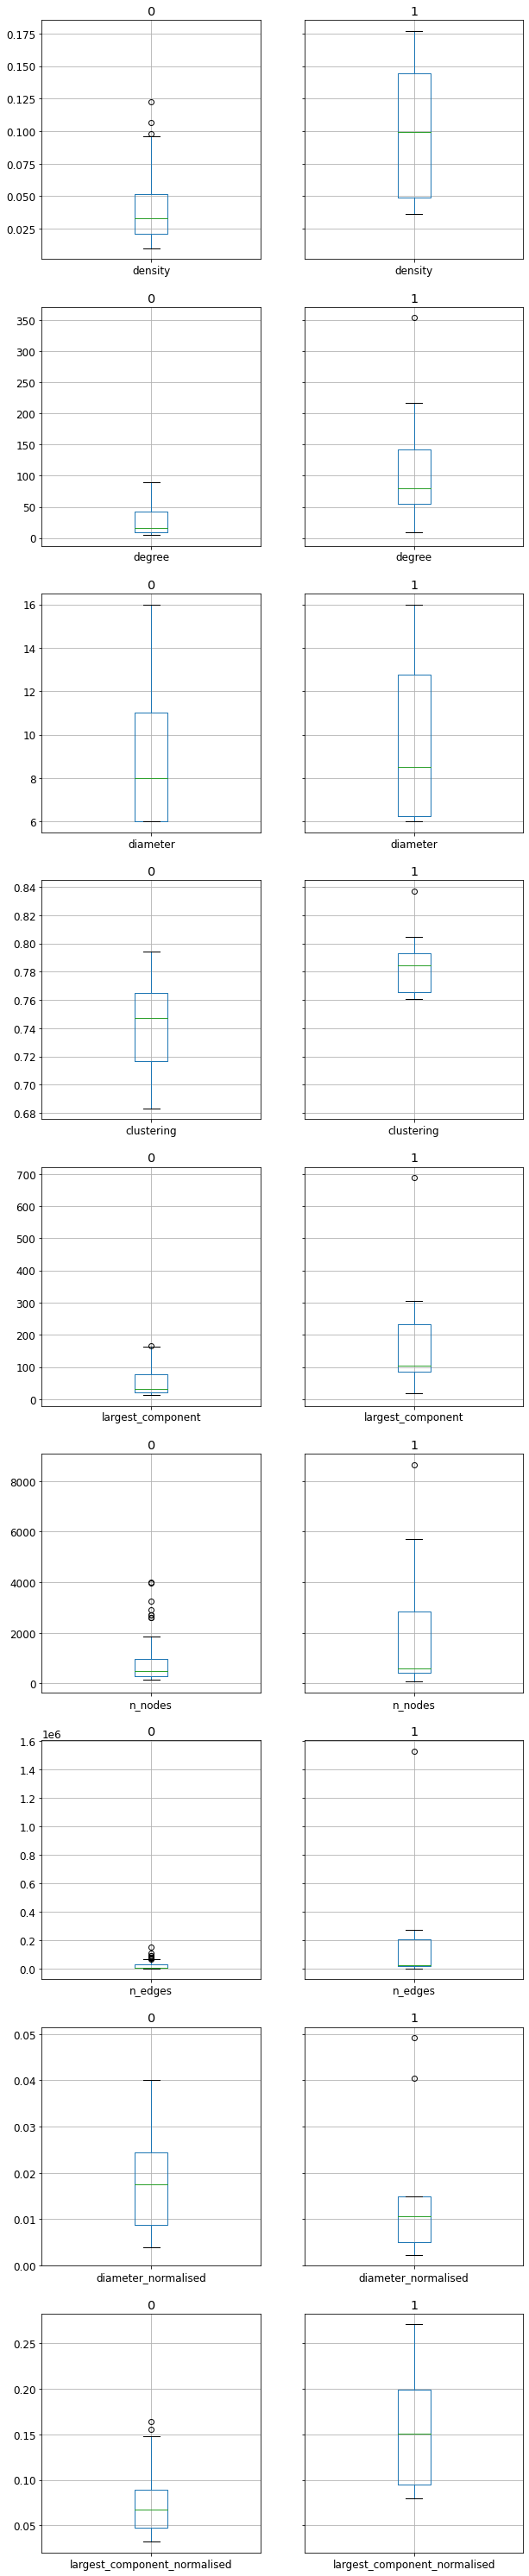

In [6]:
col = df.columns[3:]
n = len(col)

y = year[2]

df_plot = df[df.year == y]
good_df_plot = df_plot[df_plot.bad_brand == 0]
bad_df_plot = df_plot[df_plot.bad_brand == 1]

fig, axs = plt.subplots(n, 2, sharey='row', figsize=(10, n*6))

for i, t in enumerate(col):
    UL_g = good_df_plot.loc[:,[t]].quantile(0.9)[0]
    LL_g = good_df_plot.loc[:,[t]].quantile(0.1)[0]
    UL_b = bad_df_plot.loc[:,[t]].quantile(0.9)[0]
    LL_b = bad_df_plot.loc[:,[t]].quantile(0.1)[0]
    
    good_df_plot.loc[:,[t]][good_df_plot[t].between(LL_g, UL_g)].boxplot(ax=axs[i,0])
    axs[i,0].set_title('0')
    bad_df_plot.loc[:,[t]][bad_df_plot[t].between(LL_b, UL_b)].boxplot(ax=axs[i,1])
    axs[i,1].set_title('1')